# Quantum Harmonic Oscillator Demonstration

This notebook demonstrates how to use the `QuantumHarmonicOscillator` class in `qho.py`. It starts with a brief overview of the equations and moves rapidly toward using the `QuantumHarmonicOscillator` class to make plots.

Citations:

1. Atkins, P. W. & De Paula, J. Atkins’ Physical chemistry. (W.H. Freeman, 2006). Pages 290-207.
2. [Vibration-Rotation Spectrum of HCl on HyperPhysics](http://hyperphysics.phy-astr.gsu.edu/hbase/molecule/vibrot.html#c2)


In [1]:
import matplotlib.pyplot as plt
from qho import QuantumHarmonicOscillator

## Mathematical Overview

### Reduced Mass of Diatomic Molecule
Given m_1 and m_2 which are masses in kg of each atom in a diatomic molecule:
$$ m_r = {m_1m_2 \over m_1+m_2} $$

### Quantum Number
$$ v = 0, 1, 2, ... $$

### Energy levels
$$ \omega = \left(k \over m_r\right)^{1/2} $$
$$ E_v = \left(v + {1 \over 2} \right) \hbar \omega $$

### Wavefunction
The wavefunction is composed of three factors:
1. A normalization factor,
2. A Hermite polynomial, and
3. An exponential function

#### Variables to simplify the expression
$$ \alpha = \left( {\hbar^2 \over m_r k} \right)^{1/4} $$
$$ \gamma = {x \over \alpha} $$

#### Normalization
$$ N_v = \left( {1 \over \alpha \pi^{1/2} 2^v v!} \right)^{1/2} $$

#### Hermite polynomials
The Hermite polynomial needed depends on the value of the quantum number v. Here are the first three Hermite polynomials:
$$ H_0(\gamma) = 1 $$
$$ H_1(\gamma) = 2\gamma $$
$$ H_2(\gamma) = 4\gamma^2-2 $$
The `QuantumHarmonicOscillator` class supports the first 6 Hermite polynomials.

#### Pulling these pieces together
$$ \psi_v = N_vH_v(\gamma)e^{-\gamma^2 \over 2} $$

## Calculating <sup>1</sup>H<sup>35</sup>Cl
The <sup>1</sup>H<sup>35</sup>Cl molecule has the following bond force constant (k) and reduced mass (m<sub>r</sub>):
$$ k = 481 N/m $$
$$ m_r = 1.627 \times 10^{-27} kg $$

### Set the values in variables


In [2]:
k = 481.  # Bond force constant
mass_r = 1.627e-27  # Reduced mass
x_min = -0.5e-10  # Minimum distance to plot in meters
x_max = 0.5e-10  # Maximum distance to plot in meters
n_points = 1000  # Number of points to to calculate between the min and max

qho = QuantumHarmonicOscillator(k=k, mass_r=mass_r)

### Plot energy levels
Note that, for an **ideal** quantum harmonic oscillator, the energy levels are evenly spaced. Also note that, at the bottom energy level of v=0, there is still some energy in the system. This is the zero-point energy of the oscillator.

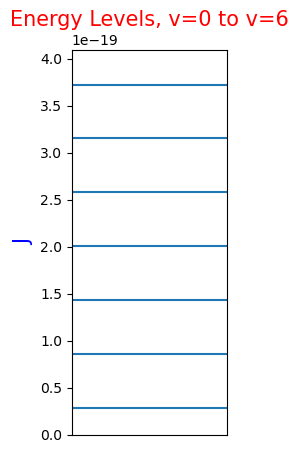

In [3]:
energies = [qho.energy(v) for v in range(qho.max_v()+1)]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2, 5))
ax.set_ylim(0., max(energies)*1.1)
ax.set_xticks([])
ax.set_ylabel('J', size=15, color='b')
ax.set_title(f'Energy Levels, v=0 to v={qho.max_v()}', size=15, color='r')
for energy in energies:
    ax.axhline(energy)

### Plot wavefunctions and their squares

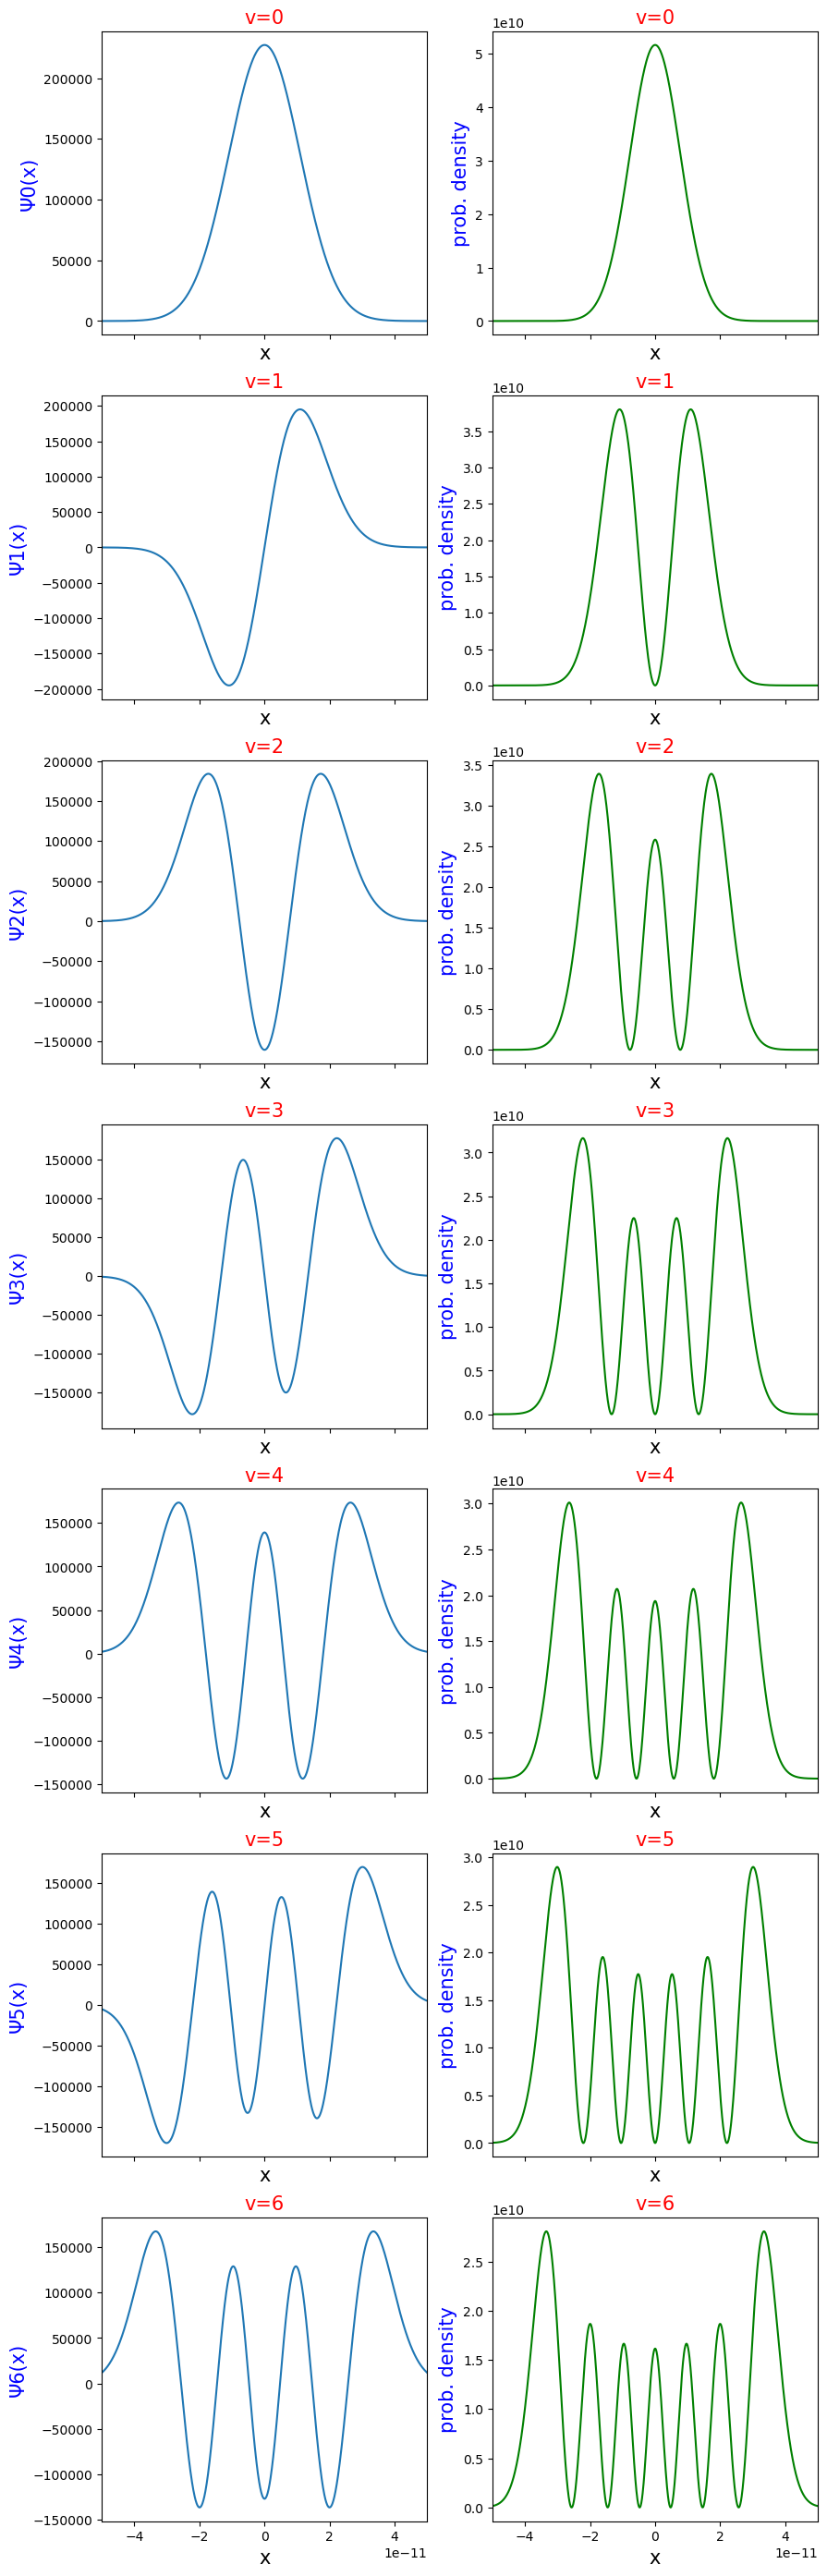

In [4]:
vs = range(qho.max_v() + 1)
fig, axs = plt.subplots(nrows=len(vs), ncols=2, figsize=(10, len(vs)*5), sharex=True)
for idx, v in enumerate(vs):
    xs_wavefunction, ys_wavefunction = qho.wavefunction_across_range(v, x_min, x_max, n_points)
    xs_prob_density, ys_prob_density = qho.prob_density(v, x_min, x_max, n_points)

    axs[v, 0].set_title(f'v={v}', size=15, color='r')
    axs[v, 0].set_ylabel(f'Ψ{v}(x)', size=15, color='b')
    axs[v, 0].set_xlabel('x', size=15)
    axs[v, 0].set_xlim(x_min, x_max)
    axs[v, 0].plot(xs_wavefunction, ys_wavefunction)

    axs[v, 1].set_title(f'v={v}', size=15, color='r')
    axs[v, 1].set_ylabel(f'prob. density', size=15, color='b')
    axs[v, 1].set_xlabel('x', size=15)
    axs[v, 1].set_xlim(x_min, x_max)
    axs[v, 1].plot(xs_prob_density, ys_prob_density, color='g')

## Validating the Code
### Integrate all Probability Densities
Do they all integrate to 1? Yes they do!

In [5]:
integrated = [qho.integrate_prob_density_between_limits(v, x_min, x_max) for v in range(qho.max_v()+1)]
print(integrated)

[0.9999999999060302, 0.9999999958746902, 0.9999999133469869, 0.9999988420530956, 0.9999889609159952, 0.9999202099533, 0.9995464589772836]


### Example From Atkins
On page 291 of Atkins, they give an example of a bond with k=500 N/m and mass of 1.7e-27 kg. Using these values, they arrive at a separation between energy levels of 5.7e-20 J. Does this agree with `QuantumHarmonicOscillator`? As the code below shows, it does!

In [6]:
qho = QuantumHarmonicOscillator(k=500, mass_r=1.7e-27)
qho.energy_separation()

5.719218676611552e-20